## SVD(Singular Value Decomposition)

SVD 역시 PCA와 유사한 행렬 분해 기법을 사용한다. PCA의 경우 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다. 일반적으로 SVD는 m x n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미한다. 


### $A = U\sum(V^T)$


SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이고 모든 특이벡터는 서로 직교하는 성질을 가진다.   
- $\sum$은 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다.   
- $\sum$이 위치한 0이 아닌 값이 바로 행렬 A이 특이값이다.   
- SVD는 A의 차원이 mxn일 때 U의 차원이 m x m, $\sum$의 차원이 m x n, $V^T$의 차원이 n x n으로 분해한다.


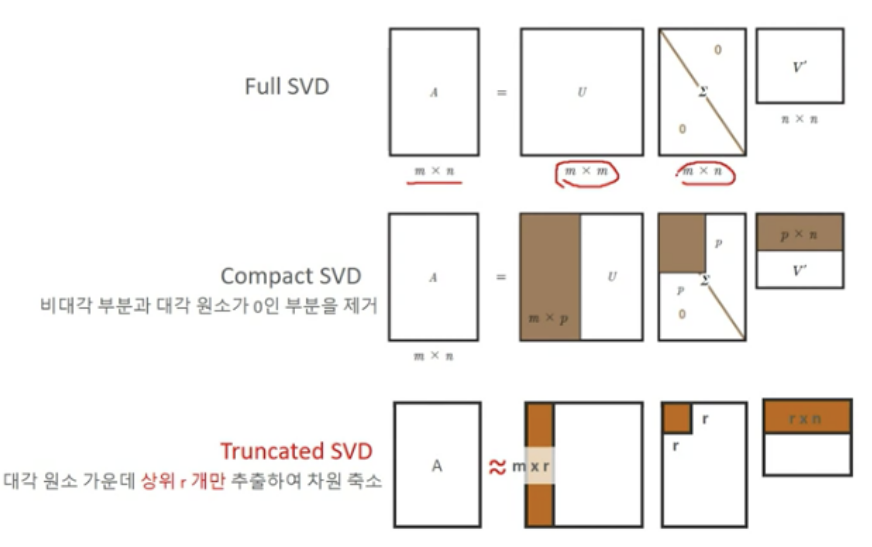


일반적으로 다음과 같이 $\sum$의 비대각적인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 $\sum$와 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다.
이런 형태로 SVD를 적용하면 A의 차원이 m x n일 때, U의 차원을 m x p, $\sum$의 차원을 p x p, $V^T$의 차원을 p x n으로 분해한다.

Truncasted SVD는 $\sum$의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다. 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행한다.


In [1]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]
(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


U행렬이 4x4, Vt행렬이 4x4로 반환, sigma는 1차원 행렬인 4,로 반환되었다.  
복원 여부도 살펴본다.

In [2]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


잘 복원된다.  
다음은 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보자, 일부러 의존성을 부여하기 위해 a행렬의 3번째 로우를 첫번째 + 두번째 로우로 업데이트하고 4번째 로우는 첫번째 로우와 같다고 업데이트했다.

In [3]:
a[2] = a[0] + a[1]
a[3] = a[0]

# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[ 0.246  0.583  0.031 -0.774]
 [-0.774 -0.017  0.587 -0.235]
 [-0.529  0.566 -0.587  0.235]
 [ 0.246  0.583  0.556  0.539]]
Sigma Value:
 [2.663 0.807 0.    0.   ]
V transpose matrix:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.604 -0.658  0.278  0.354]
 [-0.383  0.446 -0.541  0.602]]


시그마 값 중 2개가 0으로 변했다. 선형 독립인 로우 벡터의 개수가 2개라는 의미이다.

In [4]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
print('U_ matrix:\n',np.round(U_, 3))
print('V_ transpose matrix:\n',np.round(Vt_, 3))
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print('\n',np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
U_ matrix:
 [[ 0.246  0.583]
 [-0.774 -0.017]
 [-0.529  0.566]
 [ 0.246  0.583]]
V_ transpose matrix:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]]

 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD 이용  
Truncated SVD는 $\sum$행렬에 있는 대각원소 중 상위 일부 데이터만 추출해 분해하는 방식입니다.
이렇게 분해하면 인위적으로 더 작은 차원의 $U, \sum, V^T$로 분해하기 때문에 원본행렬을 정확히 원복 못한다.

In [5]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

SVD와 Truncated SVD 차원의 차이가 나는걸 볼 수 있다.
복원은 근사적으로 이뤄진다.

iris data 변환 예시

Text(0, 0.5, 'TruncatedSVD Component 2')

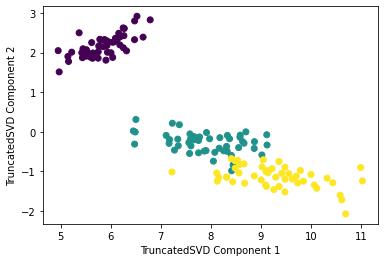

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

2.363664819426958e-15
-6.461844948013606e-17


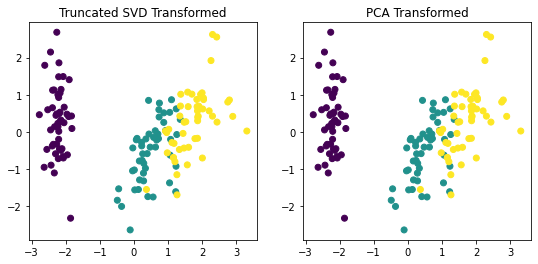

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

스케일링을 통해 데이터의 중심이 동일해지면 SVD와 PCA는 동일한 변환을 수행한다. 이는 PCA가 SVD기반의 알고리즘이기 대문이다. 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며, SVD는 값의 대부분이 0으로 이루어진 희소 행렬(Sparse Matrix)에 대한 변환도 가능하다.

## 5. NMF(Non-Negative Matrix Factorization)

NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형이다. NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.


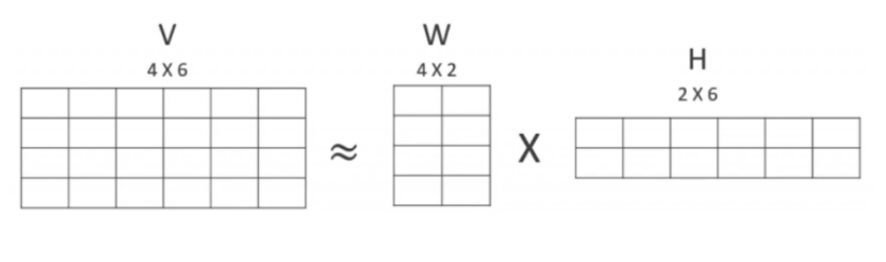


행렬 분해(Matrix Factorization)는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것이다. 이처럼 행렬 분해를 하게되면 W행렬과 H행렬은 일반적으로 길고 가는 W, 작고 넓은 H이다.
이들은 잠재 요소를 특성으로 가지게 되는데 W는 원본 행에 대해서 잠재요소의 값이 얼마나 되는지 대응하며, 분해 행렬 H는 이 잠재요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬이다.


NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용되고 있다. 

C:\Users\ohmyh\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

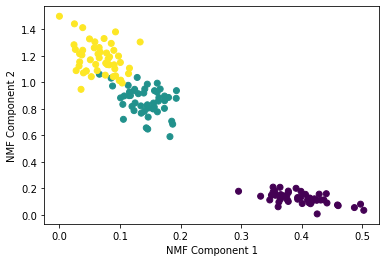

In [8]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 클러스터링 및 영화 추천과 같은 추천 영역에 활발히 활용됨  
사용자의 상품 평가 데이터 세트를 행렬 분해 기법을 통해 분해하면 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위를 예측해 높은 순위로 예측된 상품을 추천해주는 방식이다.

# 7. 군집화 

## 1. K-means 알고리즘 이해

K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘이다.
군집 중심점(centroid)라는 특정한 임의의 지점을 선택해해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.


군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세르를 반복 수행한다. 모든 데이터 포인트에서 더 이상 중심점 이동이 없을 때 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법이다.


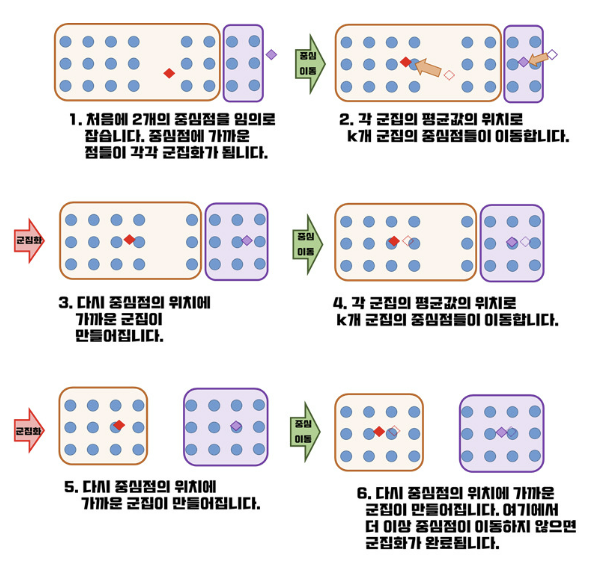


장점:  
- 일반적인 군집화에서 가장 많이 사용하는 알고리즘
- 알고리즘이 쉽고 간결


단점:
- 거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어짐(PCA를 통해 차원 감소 적용)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어렵다.

#### 사이킷런 K-means 클래스
- kmeans 초기화 파라미터 중 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미한다.
- init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정한다.
- max_iter는 최대 반복 회숫로 이전에 데이터 중심점 이동이 멈추면 종료된다.

- labels_ : 각 데이터 포인트 속한 군집 중심점 레이블
- cluster_center : 각 군집 중심점 좌표, 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 가능

In [9]:
#pip install numpy==1.21.4

붓꽃 데이터 세트 활용 군집화

In [10]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
print(irisDF.head())

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)
print(kmeans.labels_)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


C:\Users\ohmyh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


라벨값이 0,1,2로 되어있고 이는 각 레코드가 1,2,3번째 군집에 속함을 의미

In [11]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


붓꽃 데이터 세트의 target값을 'target'칼럼으로 앞에서 구한 labels_ 값을 'cluster'칼럼으로 지정해 irisDF DataFrame에 추가한 뒤에 grou by 연산을 실제 분류값인 target과 군집화 분류값인 cluster레벨로 적용해 target과 cluster값 개수를 비교할 수 있다.

target1 데이터는 2개만 2번으로 그루핑  
target2값 데이터는 0번에 14개 2번에 36개 분산되 그루핑됨

2차원 평면에 시각화

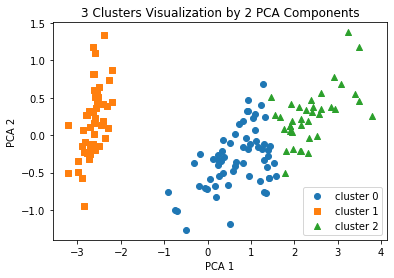

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(('cluster 0', 'cluster 1', 'cluster 2'))
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성

사이킷런의 대표적인 군집화용 데이터 생성기로 make_blobs()와 make_classificatio() API가 있다. 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만든다. 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다. 

make_blobs()는 개별 군집 중심점, 표준 편차 제어 기능 추가돼 있다.
make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용된다.
둘 다 분류 용도로 테스트 데이터 생성이 가능하다.


make_circle(), make_moon()은 중심기반 군집화로 해결 어려운 데이터 세트를 만드는데 사용된다.


make_blobs()의 간략한 사용법 
파라미터는 다음과 같다.

- n_samples : 생성할 총 데이터의 개수 default는 100개이다.
- n_features : 데이터의 feature 개수 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 feature는 x 좌표, 두 번째 feature는 y 좌표상에 표현한다.
- centers : int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타내고, ndarray 형태로 표현할 경우 개별 군집 중짐점의 좌표를 의미한다.
- cluster_std : 생성될 군집 데이터의 표준 편차를 의미 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준 편차 0.8을 가진 값으로 만들어진다. [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두번째 군집 내 데이터의 표준 편차는 1.2, 세번째 군집 내 데이터의 표준 편차는 0.6으로 만들어진다. 군집별로 서로 다른 표준 편차를 가진 dataset을 만들 때 사용된다.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


make blob로 만든 피처 데이터 세트가 어떤 군집화 분포를 가지고 만들어졌는지 확인, 타깃값 0,1,2에 따라 마커를 다르게 해 산점도를 그리면 3개의 군집 영역으로 데이터가 이뤄졌음을 알수 있다.

       ftr1      ftr2  target
0 -1.692427  3.622025       2
1  0.697940  4.428867       0
2  1.100228  4.606317       0


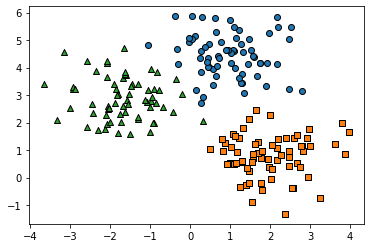

In [19]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
print(clusterDF.head(3))


target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

K-means 군집화 수행한 뒤 군집별로 시각화

C:\Users\ohmyh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


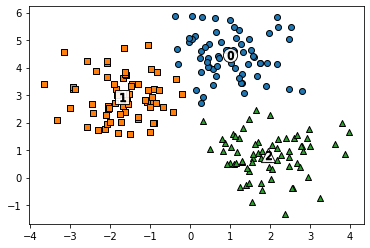

In [17]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
plt.show()

In [18]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


거의 대부분 잘 매핑되었다.